# A2
In order for the notebook to work, the samples provided in class need to be extracted into ./media/audio/Original

## T1

In [1]:
import essentia
import essentia.standard

# loader = essentia.standard.MonoLoader(filename='./media/audio/Original/gui_gref_e_mf_sol3_12.wav')
loader = essentia.standard.MonoLoader(filename='./media/audio/sine.wav')
sine = loader()

loader = essentia.standard.MonoLoader(filename='./media/audio/whitenoise.wav')
whitenoise = loader()

import IPython
IPython.display.display(IPython.display.Audio('./media/audio/sine.wav'))
IPython.display.display(IPython.display.Audio('./media/audio/whitenoise.wav'))

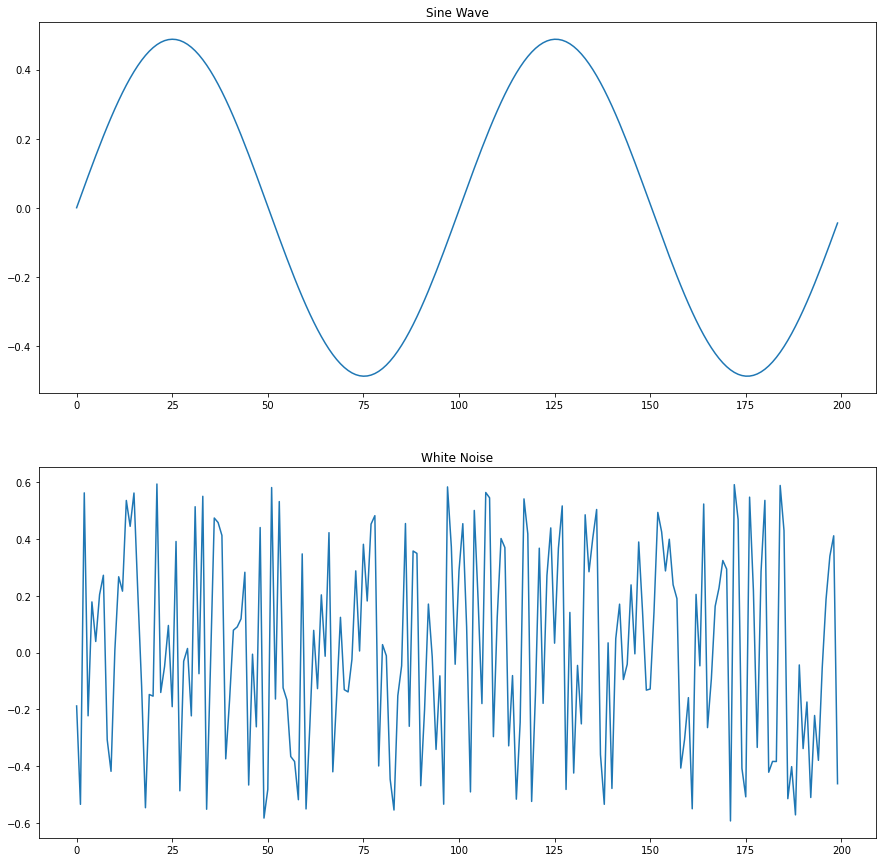

In [2]:
# pylab contains the plot() function, as well as figure, etc... (same names as Matlab)
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt

fig_wave, ax_wave = plt.subplots(2, 1, figsize = (15, 15))

ax_wave[0].title.set_text("Sine Wave")
ax_wave[0].plot(sine[0:200])

ax_wave[1].title.set_text("White Noise")
ax_wave[1].plot(whitenoise[0:200])

show()

### Zero Crossing Rate

In [3]:
from essentia.standard import *

def descriptors(audio, frame_size = 1024, hop_size = 512):
    pool = essentia.Pool()
    w = Windowing(type = 'hann')
    spectrum = Spectrum() 

    for frame in FrameGenerator(audio, frameSize = frame_size, hopSize = hop_size): # This sizes are in samples, it seems
        pool.add('lowlevel.rms', RMS()(frame))
        pool.add('lowlevel.zerocrossing', ZeroCrossingRate()(frame))
        pool.add('lowlevel.spectralcentroid', SpectralCentroidTime()(frame))
        pool.add('lowlevel.spectralspread', DistributionShape()(CentralMoments()(spectrum(w(frame))))[0])
        pool.add('lowlevel.spectralflux', Flux()(spectrum(w(frame))))
        pool.add('lowlevel.spectralflatness', Flatness()(spectrum(w(frame))))
        pool.add('sfx.logattacktime', LogAttackTime()(frame)[0])
        pool.add('sfx.temporalcentroid', Centroid()(frame))
        pool.add('sfx.effectiveduration', EffectiveDuration(thresholdRatio = 0.1)(frame))
    
    return pool

sine_pool = descriptors(sine)
whitenoise_pool = descriptors(whitenoise)

agg_sine = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(sine_pool)
agg_whitenoise = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(whitenoise_pool)

print('Sine wave:')
print('zerocrossing mean - ', agg_sine['lowlevel.zerocrossing.mean']*44100)
print('temporal centroid mean - ', agg_sine['sfx.temporalcentroid.mean'])

print('White noise:')
print('zerocrossing mean - ', agg_whitenoise['lowlevel.zerocrossing.mean']*44100)
print('temporal centroid mean - ', agg_whitenoise['sfx.temporalcentroid.mean'])


Sine wave:
zerocrossing mean -  870.7334585487843
temporal centroid mean -  0.5285963416099548
White noise:
zerocrossing mean -  22030.210849642754
temporal centroid mean -  0.40814971923828125


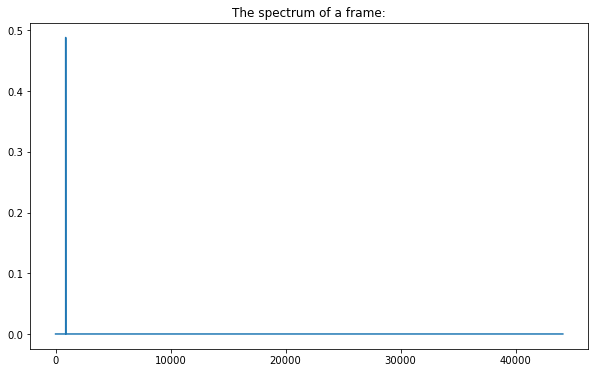

In [4]:
from essentia.standard import Spectrum, Windowing

w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
spec = spectrum(w(sine))

plt.rcParams['figure.figsize'] = (10, 6) # set plot sizes to something larger than default
plt.title("The spectrum of a frame:")

plot(spec)
show()

In [5]:
from essentia.standard import *

pool = instantaneous_descriptors(sine)

fig, ax = plt.subplots(6, 1, figsize = (15, 15))

ax[0].title.set_text("RMS")
ax[0].plot(pool['lowlevel.rms'])

ax[1].title.set_text("Zero-crossing")
ax[1].plot(pool['lowlevel.zerocrossing'])

ax[2].title.set_text("Spectral Centroid")
ax[2].plot(pool['lowlevel.spectralcentroid'])

ax[3].title.set_text("Spectral Spread")
ax[3].plot(pool['lowlevel.spectralspread'])

ax[4].title.set_text("Spectral Flux")
ax[4].plot(pool['lowlevel.spectralflux'])

ax[5].title.set_text("Spectral Flatness")
ax[5].plot(pool['lowlevel.spectralflatness'])

show()

# Auto statistics
agg = PoolAggregator(defaultStats = ['mean', 'var', 'min', 'max'])(pool)

print('RMS mean: ', agg['lowlevel.rms.mean'], 'W') # 0.5 / sqrt(2) OK
print('Zero-crossing mean: ', agg['lowlevel.zerocrossing.mean'] * 44100, 'Hz') # ~870 OKish
print('Spectral Centroid mean: ', agg['lowlevel.spectralcentroid.mean'], 'Hz') # ~440 OK
print('Spectral Spread mean: ', agg['lowlevel.spectralspread.mean'], 'Hz') # ~0 OK
print('Spectral Flux mean: ', agg['lowlevel.spectralflux.mean']) # ~0 OK
print('Spectral Flatness mean: ', agg['lowlevel.spectralflatness.mean']) # ~0 OK?? 



NameError: name 'instantaneous_descriptors' is not defined